In [ ]:
# PREPARAÇÃO DOS DADOS - CLASSIFICAÇÃO (Tinto vs Branco)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar dados
dados_vinho = pd.read_csv('winequality.csv')

print("=== PREPARANDO DADOS PARA CLASSIFICAÇÃO ===")

# 1. Separar features e target
features = dados_vinho.drop(['quality', 'classe'], axis=1)
target_classificacao = np.where(dados_vinho['classe'] == 'tinto', 1, 0)

print(f"Características: {features.shape}")
print(f"Distribuição das classes:")
print(f"  - Vinhos brancos (0): {np.sum(target_classificacao == 0)}")
print(f"  - Vinhos tintos (1): {np.sum(target_classificacao == 1)}")

# 2. Dividir em treino e teste
carac_treino_class, carac_teste_class, alvo_treino_class, alvo_teste_class = train_test_split(
    features, 
    target_classificacao, 
    test_size=0.2, 
    random_state=42, 
    stratify=target_classificacao  # Mantém proporção das classes
)

print(f"\nDivisão treino/teste:")
print(f"  Treino: {carac_treino_class.shape}")
print(f"  Teste: {carac_teste_class.shape}")

# 3. Normalizar os dados
normalizador_classificacao = StandardScaler()
features_treino_class_normalizadas = normalizador_classificacao.fit_transform(carac_treino_class)
features_teste_class_normalizadas = normalizador_classificacao.transform(carac_teste_class)

print(f"\nDados normalizados:")
print(f"  Treino normalizado: {features_treino_class_normalizadas.shape}")
print(f"  Teste normalizado: {features_teste_class_normalizadas.shape}")



=== PREPARANDO DADOS PARA CLASSIFICAÇÃO ===
Características: (5911, 11)
Distribuição das classes:
  - Vinhos brancos (0): 4708
  - Vinhos tintos (1): 1203

Divisão treino/teste:
  Treino: (4728, 11)
  Teste: (1183, 11)

Dados normalizados:
  Treino normalizado: (4728, 11)
  Teste normalizado: (1183, 11)



=== MODELO DE CLASSIFICAÇÃO (Scikit-learn) ===
Acurácia: 0.9958
Precisão: 0.9876
Recall: 0.9917
F1-Score: 0.9896


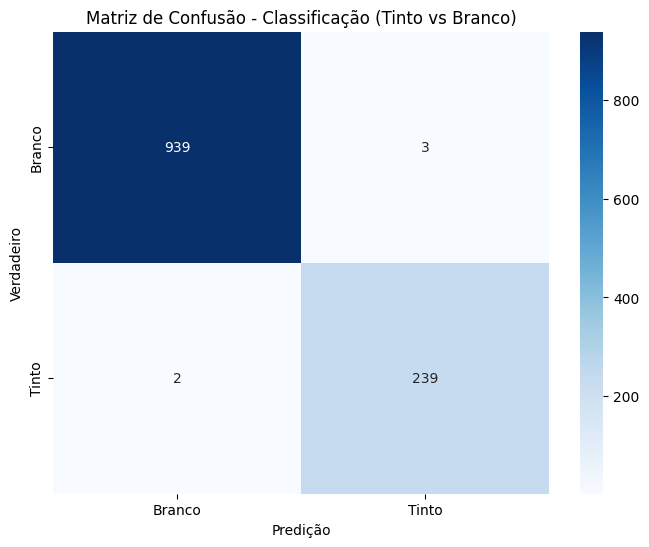


Features mais importantes para classificação:
                 feature  coefficient
7                density     4.634201
3         residual sugar    -2.930247
6   total sulfur dioxide    -2.869015
10               alcohol     1.845307
1       volatile acidity     1.099427
5    free sulfur dioxide     0.898225
4              chlorides     0.656946
9              sulphates     0.528060
2            citric acid    -0.260238
0          fixed acidity    -0.144731


In [ ]:
# CLASSIFICAÇÃO COM SCIKIT-LEARN (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\n=== MODELO DE CLASSIFICAÇÃO (Scikit-learn) ===")

# Criar e treinar modelo
modelo_classificacao = LogisticRegression(random_state=42)
modelo_classificacao.fit(features_treino_class_normalizadas, alvo_treino_class)

# Fazer previsões
previsoes_classificacao = modelo_classificacao.predict(features_teste_class_normalizadas)

# Calcular métricas
acuracia = accuracy_score(alvo_teste_class, previsoes_classificacao)
precisao = precision_score(alvo_teste_class, previsoes_classificacao)
recall = recall_score(alvo_teste_class, previsoes_classificacao)
f1 = f1_score(alvo_teste_class, previsoes_classificacao)

print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Matriz de confusão
matriz_confusao = confusion_matrix(alvo_teste_class, previsoes_classificacao)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Branco', 'Tinto'], 
            yticklabels=['Branco', 'Tinto'])
plt.title('Matriz de Confusão - Classificação (Tinto vs Branco)')
plt.ylabel('Verdadeiro')
plt.xlabel('Predição')
plt.show()

# Coeficientes (importância das features)
importancia_features = pd.DataFrame({
    'feature': features.columns,  # Usando features.columns das características originais
    'coefficient': modelo_classificacao.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print("\nFeatures mais importantes para classificação:")
print(importancia_features.head(10))


In [ ]:
# Classificação com Modelo Manual 